# Exploratory Data Analysis <a id='Начало'></a>

### Задача:

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в 
повышении уровня благополучия детей по всему миру. 

**Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по 
математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.**

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

### Опиcание колонок датасета:

1.school — аббревиатура школы, в которой учится ученик

2.sex — пол ученика ('F' - женский, 'M' - мужской)

3.age — возраст ученика (от 15 до 22)

4.address — тип адреса ученика ('U' - городской, 'R' - за городом)

5.famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6.Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7.Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8.Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9.Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не 
работает, 'other' - другое)

10.Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не 
работает, 'other' - другое)

11.reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная 
программа, 'other' - другое)

12.guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13.traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14.studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15.failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

16.schoolsup — дополнительная образовательная поддержка (yes или no)

17.famsup — семейная образовательная поддержка (yes или no)

18.paid — дополнительные платные занятия по математике (yes или no)

19.activities — дополнительные внеучебные занятия (yes или no)

20.nursery — посещал детский сад (yes или no)

21.higher — хочет получить высшее образование (yes или no)

22.internet — наличие интернета дома (yes или no)

23.romantic — в романтических отношениях (yes или no)

24.famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25.freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26.goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27.health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28.absences — количество пропущенных занятий

29.score — баллы по госэкзамену по математике

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [4]:
#Загружаем данные
data = pd.read_csv('stud_math.csv')

## 1.Первичный осмотр данных

In [5]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [6]:
# наименования и типы столбцов 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [7]:
# Проверка на уникальные данные
data.nunique().sort_values(ascending=False)

absences               36
score                  18
age                     8
famrel                  6
Fedu                    6
health                  5
goout                   5
freetime                5
Medu                    5
Mjob                    5
Fjob                    5
reason                  4
traveltime              4
studytime               4
failures                4
studytime, granular     4
guardian                3
schoolsup               2
famsup                  2
paid                    2
activities              2
nursery                 2
higher                  2
internet                2
Pstatus                 2
famsize                 2
address                 2
romantic                2
sex                     2
school                  2
dtype: int64

11.0

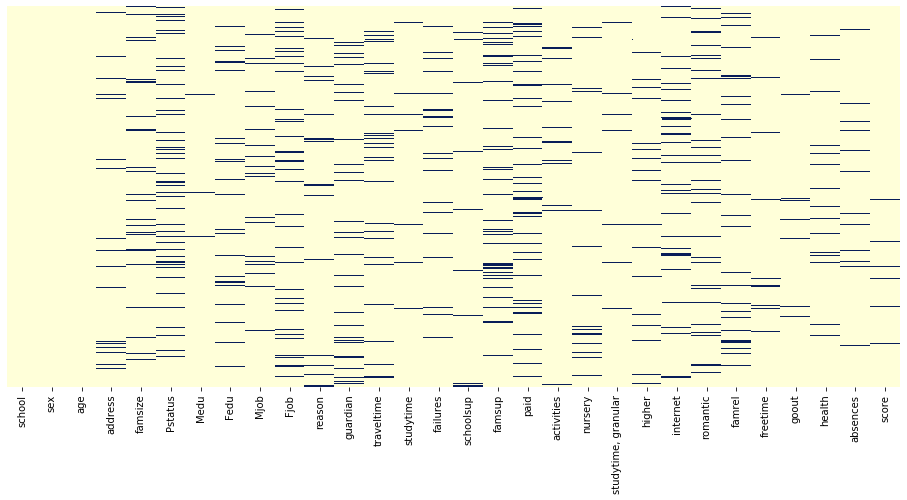

In [8]:
#Проверка пропусков в столбцах и максимальный процент пропусков
plt.figure(figsize=(16, 7))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap = 'YlGnBu')
round((data.isnull().sum(axis = 0).max() / len(data)) * 100, 0)

### Вывод:
В загруженном наборе данных 395 строк и 30  столбцов. Небольшое количество пропусков. В основном в столбце Pstatus 11%.

[В начало](#Начало)

## 2.Первичный анализ данных в столбцах

In [9]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [10]:
# приведем названия столбцов в более удобный вариант 
data.rename(columns={'Pstatus': 'p_status', 'Medu':'m_edu', 'Fedu':'f_edu',
       'Mjob':'m_job', 'Fjob':'f_job', 'studytime, granular': 'studytime_granular'}, inplace=True)
data.head(5)

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [11]:
# составим функции обработки столбцов
def process_numerical(column):
    '''Функция обработки числовых столбцов'''
    
    perc25 = data[column].quantile(0.25)
    perc75 = data[column].quantile(0.75)
    median = data[column].median()
    IQR    = perc75 - perc25
    range_min = data[column].min()
    range_max = data[column].max()   
    range_hist = (range_min, range_max)
    nan_count = data[column].isna().sum()
    emissions = data[column].loc[(data[column] < perc25 - 1.5*IQR) | (data[column] > perc75 + 1.5*IQR)]
    
    data[column].describe();
    print('Количество пропусков в столбце: '.format(nan_count),
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        'IQR: {}, '.format(IQR))
    print('Границы выбросов: [{f}, {l}].'.format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR)
          , 'Количество выбросов: ', len(emissions))
     
    data[column].loc[data[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)] \
                    .hist(bins = 15, range = range_hist, label = 'IQR')
    
    emissions.hist(bins = 15, range = range_hist, color = 'red', label = 'Выбросы')
     
    plt.legend()

In [48]:
def process_string(column, tableview):
    '''Функция обработки строковых столбцов'''
    
    unique_str  = data[column].unique()
    nan_str = data[column].isnull().sum()
    
    print('\033[1m' + column + '\033[0m')
    print('Уникальные значения: {}'.format(unique_str))
    print('Количество пустых значений: {}\n'.format(nan_str))
    
    if tableview:
        print(data[column].value_counts(normalize=True))
        
    print('\n')

**Столбцы делятся на два типа:**

**float64**: из них -
         
         числовые      : 'age', 'absences', 'score'
         
         категориальные: 'm_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 
                         'freetime', 'goout', 'health', 'absences', 'score'    
        
**object** : из них -

         бинарные      : 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'
        
         категориальные: 'school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian'

In [13]:
# Составим списки и проанализируем по группам
object_categorial = ['school', 'sex', 'address', 'famsize', 'p_status', 'm_job', 'f_job', 'reason', 'guardian']
object_binary     = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

float_numerical  = ['age', 'absences', 'score']
float_categorial = ['m_edu', 'f_edu', 'traveltime', 'studytime', 'failures', 'studytime_granular', 'famrel', 
                    'freetime', 'goout', 'health']

### Проанализируем колонки по группам

In [49]:
## Проанализируем колонки object_categorial 
for col in object_categorial:
    process_string(col, True)

school
Уникальные значения: ['GP' 'MS']
Количество пустых значений: 0

GP    0.883544
MS    0.116456
Name: school, dtype: float64


sex
Уникальные значения: ['F' 'M']
Количество пустых значений: 0

F    0.526582
M    0.473418
Name: sex, dtype: float64


address
Уникальные значения: ['U' nan 'R']
Количество пустых значений: 17

U    0.780423
R    0.219577
Name: address, dtype: float64


famsize
Уникальные значения: [nan 'GT3' 'LE3']
Количество пустых значений: 27

GT3    0.709239
LE3    0.290761
Name: famsize, dtype: float64


p_status
Уникальные значения: ['A' nan 'T']
Количество пустых значений: 45

T    0.897143
A    0.102857
Name: p_status, dtype: float64


m_job
Уникальные значения: ['at_home' 'health' 'other' 'services' 'teacher' nan]
Количество пустых значений: 19

other       0.353723
services    0.260638
at_home     0.154255
teacher     0.146277
health      0.085106
Name: m_job, dtype: float64


f_job
Уникальные значения: ['teacher' 'other' nan 'health' 'services' 'at_home']
Ко

**Вывод:** school и sex заполнены полностью. В остальных столбцах достаточно много пропусков. Для дальнейшего анализа пустые значения пока заполнять не будем.

In [15]:
## Проанализируем колонки object_binary 
for col in object_binary:
    process_string(col, True)

schoolsup
Уникальные значения: ['yes' 'no' nan]
Количество пустых значений: 9

no     0.867876
yes    0.132124
Name: schoolsup, dtype: float64


famsup
Уникальные значения: ['no' 'yes' nan]
Количество пустых значений: 39

yes    0.615169
no     0.384831
Name: famsup, dtype: float64


paid
Уникальные значения: ['no' nan 'yes']
Количество пустых значений: 40

no     0.56338
yes    0.43662
Name: paid, dtype: float64


activities
Уникальные значения: ['no' 'yes' nan]
Количество пустых значений: 14

yes    0.511811
no     0.488189
Name: activities, dtype: float64


nursery
Уникальные значения: ['yes' 'no' nan]
Количество пустых значений: 16

yes    0.791557
no     0.208443
Name: nursery, dtype: float64


higher
Уникальные значения: ['yes' nan 'no']
Количество пустых значений: 20

yes    0.949333
no     0.050667
Name: higher, dtype: float64


internet
Уникальные значения: [nan 'yes' 'no']
Количество пустых значений: 34

yes    0.844875
no     0.155125
Name: internet, dtype: float64


romanti

**Вывод:** В столбцах немного пропусков. Столбцы internet, nursery, higher имеют больше положительных ответов. Приводить к бинарному виду пока не будем, т.к. по анализу далее будет видно.

In [16]:
## Проанализируем колонки float_categorial 
for col in float_categorial:
    process_string(col, False)

m_edu
Уникальные значения: [ 4.  1.  3.  2. nan  0.]
Количество пустых значений: 3



f_edu
Уникальные значения: [ 4.  1.  2.  3. 40. nan  0.]
Количество пустых значений: 24



traveltime
Уникальные значения: [ 2.  1.  3. nan  4.]
Количество пустых значений: 28



studytime
Уникальные значения: [ 2.  3.  1. nan  4.]
Количество пустых значений: 7



failures
Уникальные значения: [ 0.  3. nan  2.  1.]
Количество пустых значений: 22



studytime_granular
Уникальные значения: [ -6.  -9.  -3.  nan -12.]
Количество пустых значений: 7



famrel
Уникальные значения: [ 4.  5.  3. nan -1.  2.  1.]
Количество пустых значений: 27



freetime
Уникальные значения: [ 3.  2.  4.  1.  5. nan]
Количество пустых значений: 11



goout
Уникальные значения: [ 4.  3.  2.  1.  5. nan]
Количество пустых значений: 8



health
Уникальные значения: [ 3.  5.  1.  2.  4. nan]
Количество пустых значений: 15





**Заметка :** По уникальным значениям заметно, что колонка studytime_granular совпадает с колонкой studytime(значения умножены на -3). Поэтому колонку studytime_granular можно удалить.

In [17]:
#Удаляем колонку
data.drop(['studytime_granular'], inplace=True, axis=1)

**Заметка :** Видно что колонки f_edu и famrel содержат выбросы. Проанализируем их детально.

### f_edu

In [18]:
# Выведем значения столбца
data['f_edu'].value_counts(normalize=True)

2.0     0.285714
3.0     0.258760
4.0     0.237197
1.0     0.210243
0.0     0.005391
40.0    0.002695
Name: f_edu, dtype: float64

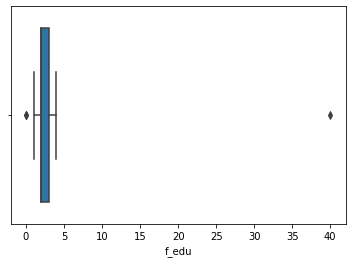

In [19]:
# Столбец содержит выброс - значение 40
sns.boxplot(data['f_edu'])

In [20]:
#Возможно это ошибка и мы заменим значение на близкое, т.е. 4
data.loc[data['f_edu'] == 40, 'f_edu'] = 4

### famrel

In [21]:
# Выведем значения столбца
data['famrel'].value_counts(normalize=True)

 4.0    0.494565
 5.0    0.269022
 3.0    0.168478
 2.0    0.046196
 1.0    0.019022
-1.0    0.002717
Name: famrel, dtype: float64

In [22]:
#Столбец famrel содержит ошибку значение -1. Заменим значение на более подходящее 1
data.loc[data['famrel'] == -1.0, 'famrel'] = 1.0

**Вывод:** В данных были ошибки ввода в колонках f_edu и famrel. Эти даннные были исправлены для корректного анализа. Также была удалена колонка studytime_granular в  связи с ее обратной корреляцией с колонкой studytime.

Проанализируем колонки **'age', 'absences', 'score'** по отдельности:

### age

Количество пропусков в столбце:  25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, 
Границы выбросов: [13.0, 21.0]. Количество выбросов:  1


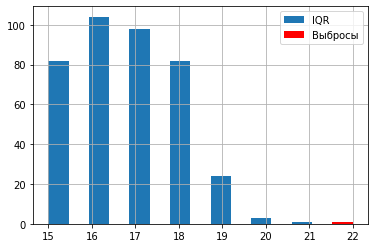

In [23]:
process_numerical('age')

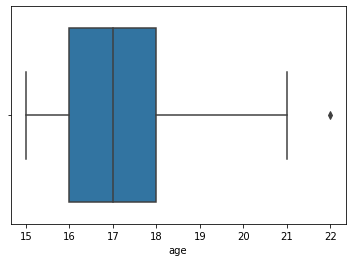

In [24]:
# в данном столбце есть выбросы
sns.boxplot(data['age'])

In [25]:
# устраним выброс из стобца заменив значение на медианное
data.loc[data['age'] == 22, 'age'] = data['age'].median()

### absences

Количество пропусков в столбце:  25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0, 
Границы выбросов: [-12.0, 20.0]. Количество выбросов:  17


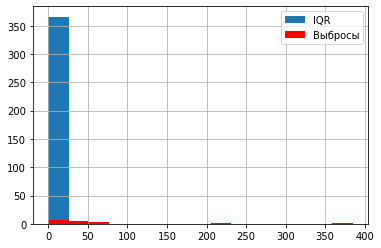

In [26]:
process_numerical('absences')

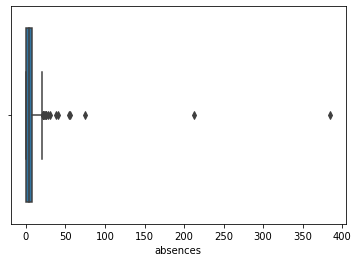

In [27]:
# в данном столбце есть выбросы
sns.boxplot(data['absences'])

Среди всех выбросов выделяются два аномально больших 385 и 212(возможно это ошибка). Уберем эти записи, чтобы избежать смещений при дальнейшем анализе.

In [28]:
# Удалим выбросы
data.loc[(data['absences'] > 200.0), 'absences'] = np.nan

### score

Количество пропусков в столбце:  25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0, 
Границы выбросов: [-5.0, 115.0]. Количество выбросов:  0


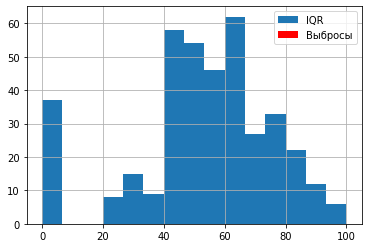

In [34]:
process_numerical('score')

### Вывод:
Данные содержат небольшое количество пропусков. В целом были заполнены корректно за исключением: 'f_edu' - лишний ноль в 1 записи, 'famrel' - ошибочный знак минус, 'age' - выброс был заменен на медианное значение, 'absences' - два выброса были удалены, удалён столбец 'studytime_granular' он повторяет 'studytime' (значения умножены на -3).

[В начало](#Начало)

# 3.Корреляционный анализ

Выявим какие столбцы коррелируют с главным показателем score. Это поможет выявить показатели для дальнейшего построения модели.

In [35]:
corr_t = data.corr()
corr_t

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167711,-0.152538,0.090388,-0.003154,0.194732,0.056274,0.021583,0.120664,-0.048418,0.157310,-0.153825
m_edu,-0.167711,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,0.097295,0.213349
f_edu,-0.152538,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,0.040514,0.130923
traveltime,0.090388,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.014040,-0.070559
studytime,-0.003154,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.067734,0.115741
failures,0.194732,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.069703,-0.344338
famrel,0.056274,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.051402,0.055305
freetime,0.021583,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,-0.070416,0.019026
goout,0.120664,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,0.036836,-0.129685
health,-0.048418,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.021752,-0.070460


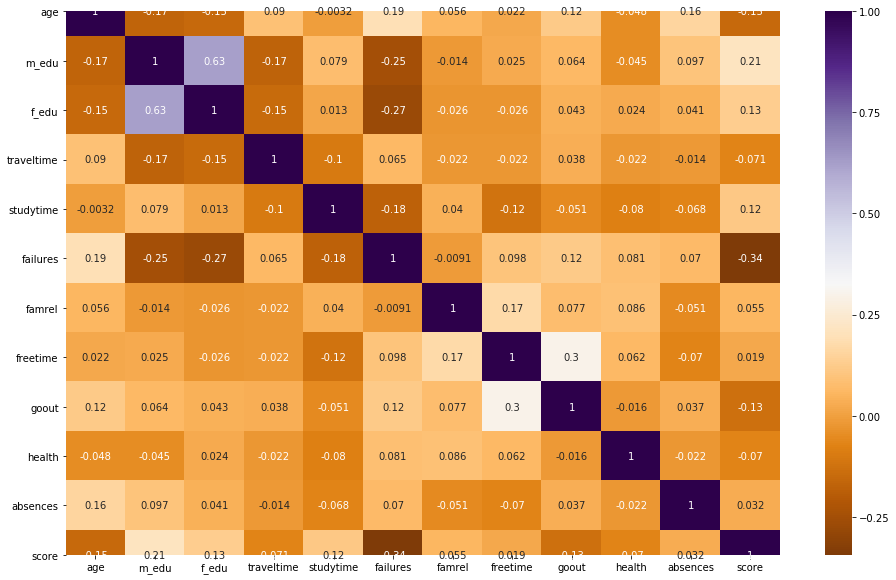

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_t, cmap="PuOr", annot=True)

Из корреляционного анализа видно:
    
+ Столбцы f_edu и m_edu умеренно скоррелированы. Поэтому удалим f_edu, так как он слабее коррелирует со score.
+ Столбец freetime почти не коррелирует со score. Поэтому его также можно удалить.

In [37]:
#Удаляем столбцы f_edu и freetime
data.drop(columns='f_edu', inplace=True)
data.drop(columns='freetime', inplace=True)

### Вывод:
Из корреляционного анализа числовых переменных стало понятно, что значения age и absences влияют на целевую переменную score. 
Также стало понятно что столбцы absences и score слабоскоррелированы. Количество пропусков почти не влияет на результат. А столбцы goout и freetimе являются хорошо скореллироваными.

[В начало](#Начало)

# 4.Анализ номинативных переменных

Отберем номинативные переменные их и проведем анализ влияния на целевые показатели.

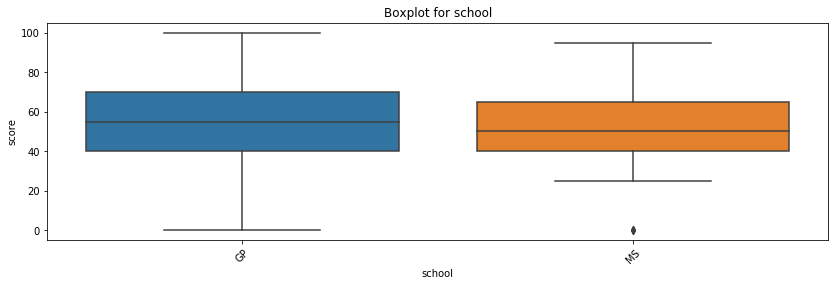

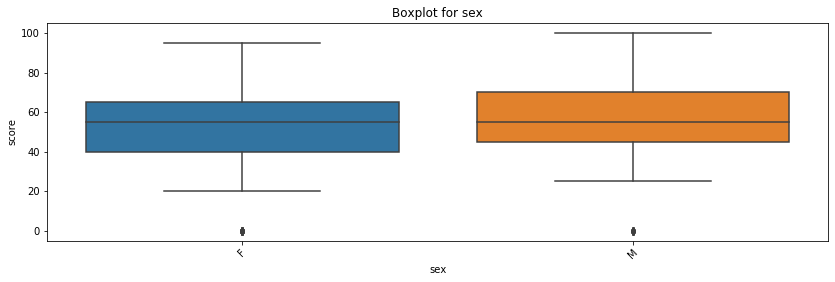

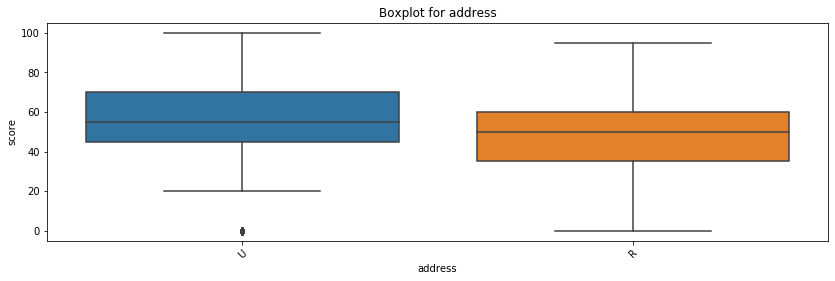

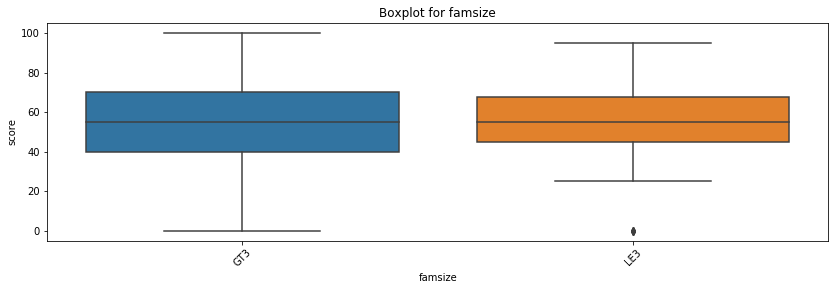

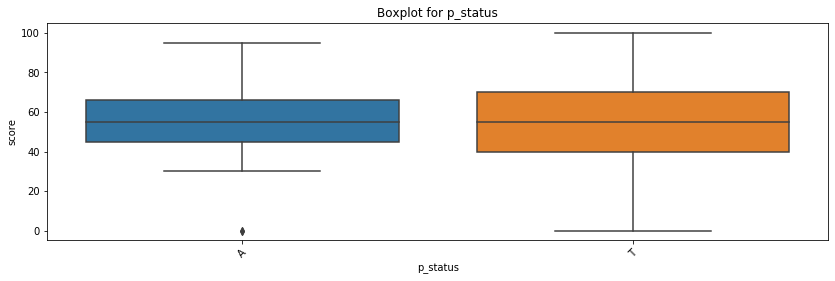

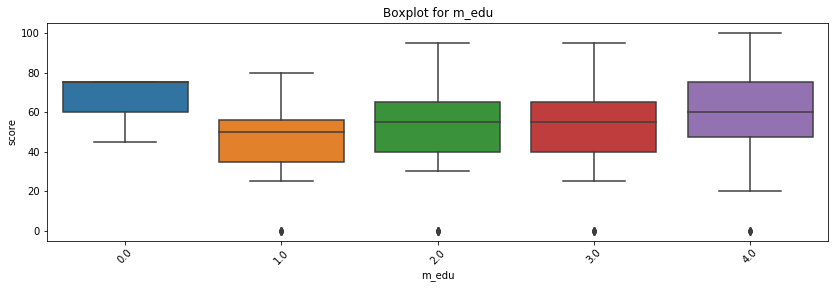

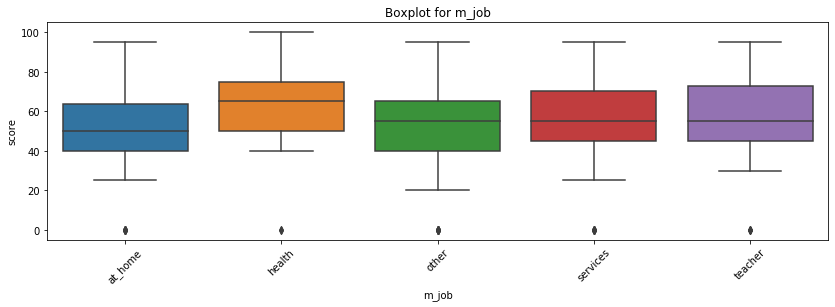

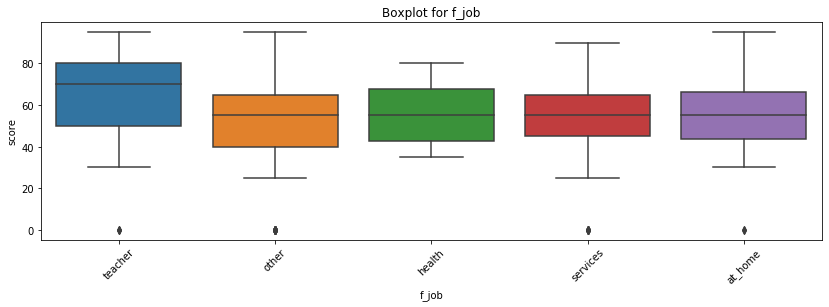

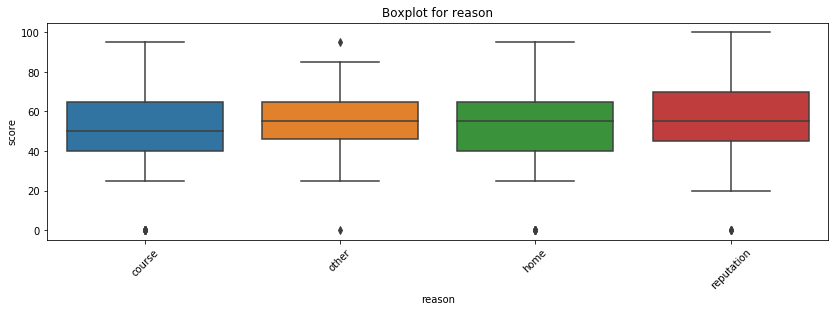

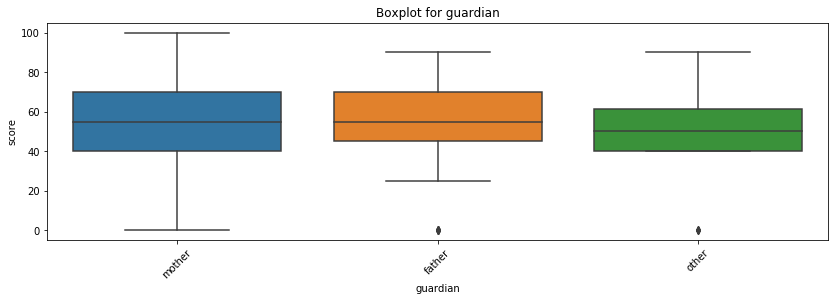

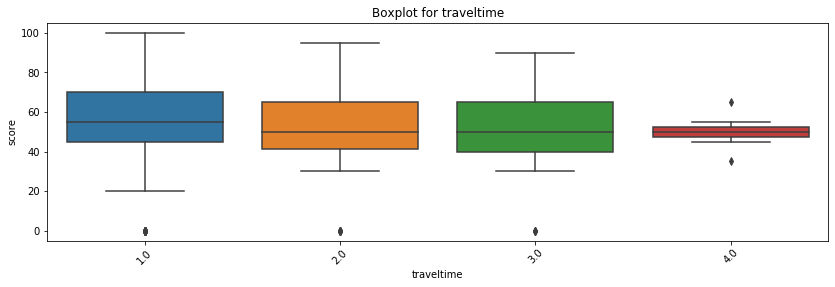

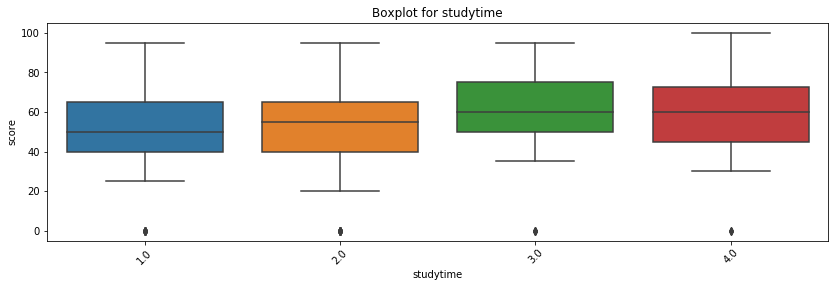

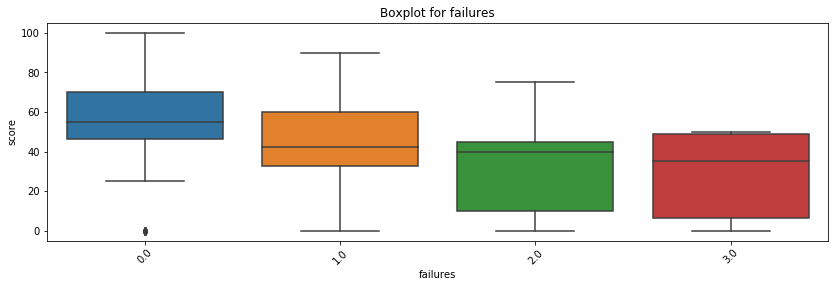

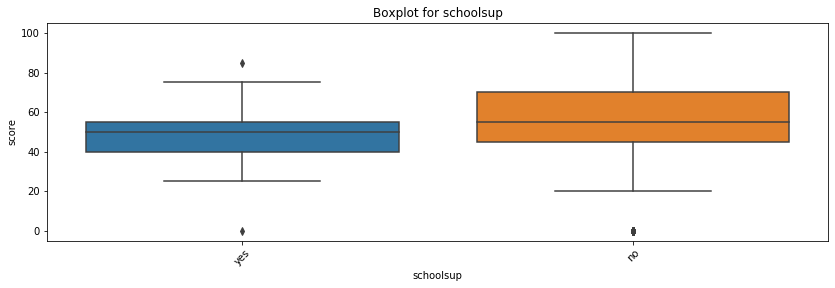

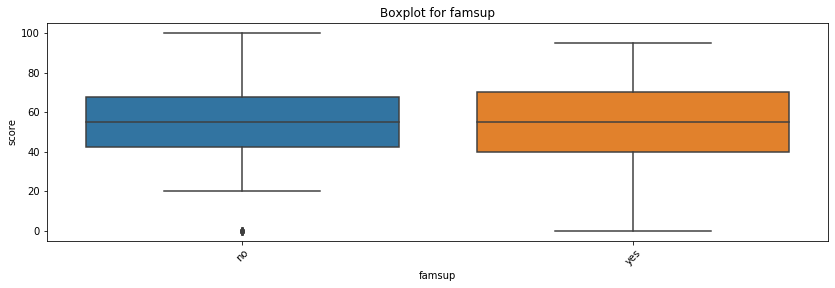

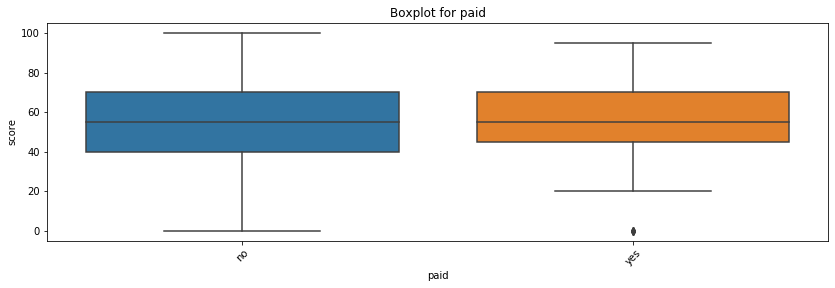

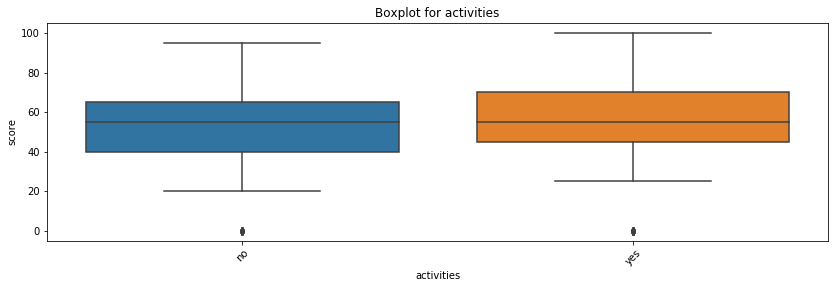

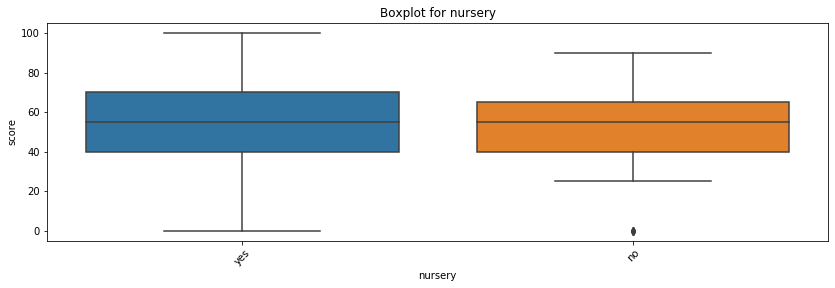

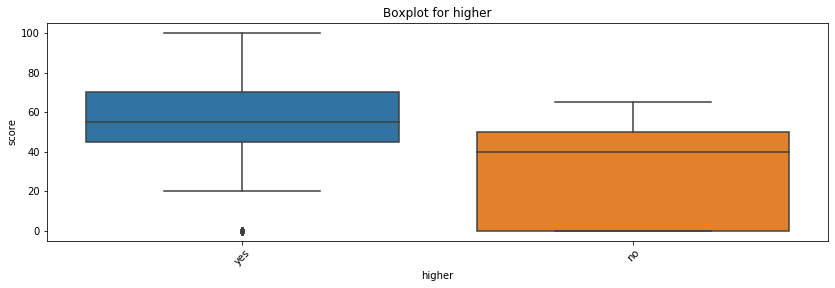

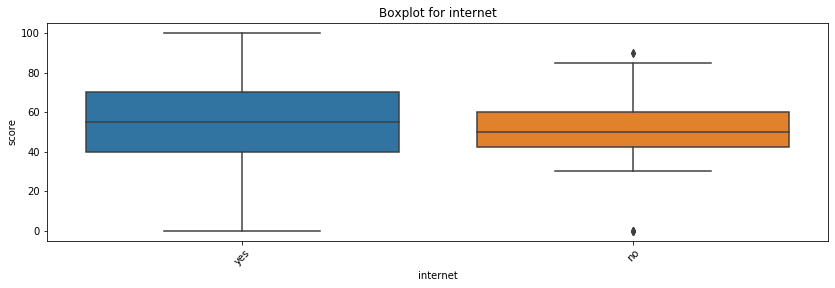

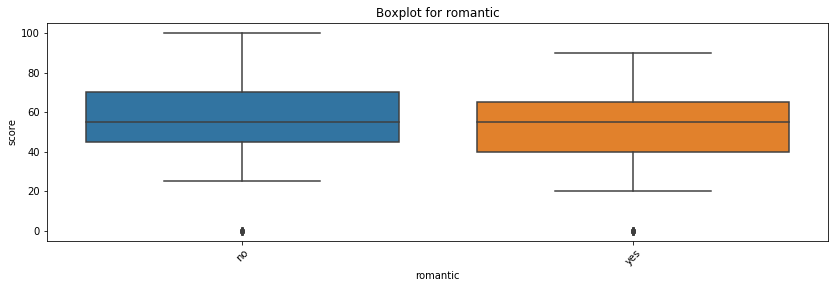

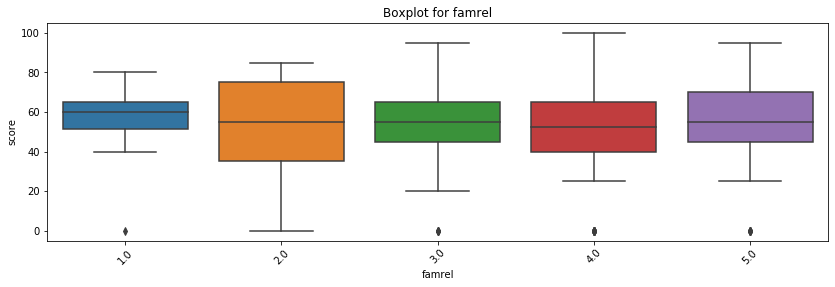

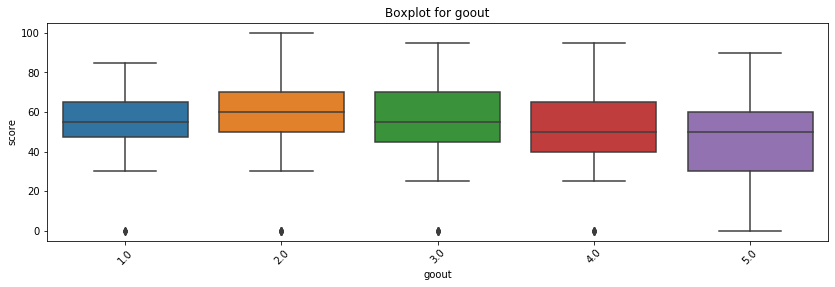

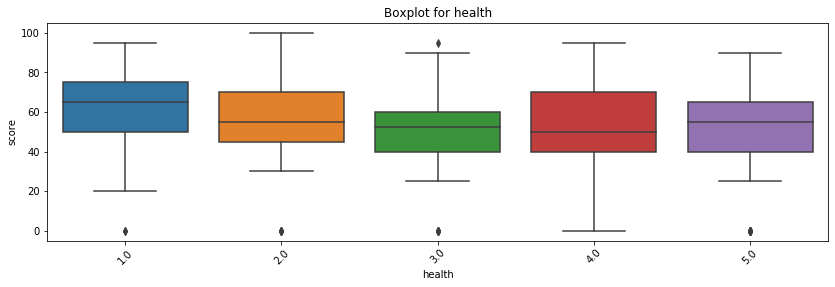

In [38]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

nominative_col = ['school', 'sex', 'address', 'famsize', 'p_status', 'm_edu', 'm_job', 'f_job', 'reason', 'guardian', 
                  'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
                  'internet', 'romantic', 'famrel', 'goout', 'health']

for col in nominative_col:
    get_boxplot(col)

Из графиков видно, что параметры 'famsize', 'activities', 'nursery' не влияют на 'score'.

In [39]:
# Найдем статистически значимые различия для 'score' 
def get_stat_dif(column):
    cols = data.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                        data.loc[data.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

for col in nominative_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Анализ показал, что на результаты экзамена могут влиять параметры:
+ age, absences, address, m_edu, m_job, failures, higher, romantic, goout.

### Вывод:
Важные номинативные переменные которые оказывают влияние на оценку 'score' - 'address', 'm_edu', 'm_job', 'failures', 'higher', 'romantic', 'goout'. На их основании получим итоговый датасет для дальнейшего моделирования:

[В начало](#Начало)

In [40]:
data_model = data[['age', 'absences', 'address', 'm_edu', 'm_job', 'failures', 'higher', 'romantic', 'goout', 'score']]
data_model.head(5)

,age,absences,address,m_edu,m_job,failures,higher,romantic,goout,score
0,18.0,6.0,U,4.0,at_home,0.0,yes,no,4.0,30.0
1,17.0,4.0,U,1.0,at_home,0.0,yes,no,3.0,30.0
2,15.0,10.0,U,1.0,at_home,3.0,yes,NaN,2.0,50.0
3,15.0,2.0,U,4.0,health,0.0,yes,yes,2.0,75.0
4,16.0,4.0,U,3.0,other,0.0,yes,no,2.0,50.0


# Итоги работы

На основании разведывательного анализа можно сделать выводы:
+ В первоначальном наборе данных содержалось 395 строк, 30 столбцов. Три из них запонены полностью.  
+ Сделан вывод о том, что данные являются чистыми, но содержат небольшое количество пропусков. Максимальная доля пропусков в столбце 'p_status'(11%).
+ После подробного анализа столбцов и корреляционного анализа были удалены столбцы - 'studytime_granular', 'f_edu', 'freetime'.
+ Были исправлены неверные значения в столбцах - 'f_edu' и 'famrel'.
+ Выявлены выбросы в колонках - 'age', 'absences'. Максимальное количество выбросов в 'absences'(17).
+ Корреляции среди числовых признаков минимальны. Анализ позволил отобрать слабоскоррелированные переменные.
+ Анализ номинативных переменных основанный на тесте Стьюдента позволил отобрать статистически значимые переменные для дальнейшего посстроения модели данных.
